In [35]:
from torch import nn
import torch
from math import log
import matplotlib.pyplot as plt
import numpy as np

In [36]:
class PositionalEncoding(nn.Module):

    def __init__(self, embed_dim, input_dim):
        """
        embed_dim: num of expected features in input (same as d_model)
        input_dim: length of sequence
        """
        super().__init__()

        encod = torch.zeros(input_dim, embed_dim)

        position = torch.arange(0, input_dim, dtype=torch.float).unsqueeze(1)   # numerator

        i = torch.arange(0, embed_dim, 2, dtype=torch.float)

        denom = torch.exp(log(10000.0) * i / embed_dim)

        encod[ : , 0::2] = torch.sin(position / denom)
        encod[ : , 1::2] = torch.cos(position / denom)
        encod.unsqueeze(0)

        self.pe = encod


    def forward(self, x):
        x = x + self.pe[:, : x.size(1)]
        return x

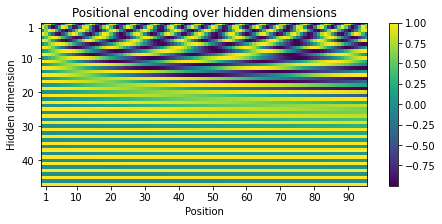

In [37]:
encoder = PositionalEncoding(embed_dim=48, input_dim=96)
pe = encoder.pe.squeeze().T.cpu().numpy()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
pos = ax.imshow(pe)
fig.colorbar(pos, ax=ax)
ax.set_xlabel("Position")
ax.set_ylabel("Hidden dimension")
ax.set_title("Positional encoding over hidden dimensions")
ax.set_xticks([1]+[i*10 for i in range(1,1+pe.shape[1]//10)])
ax.set_yticks([1]+[i*10 for i in range(1,1+pe.shape[0]//10)])
plt.show()

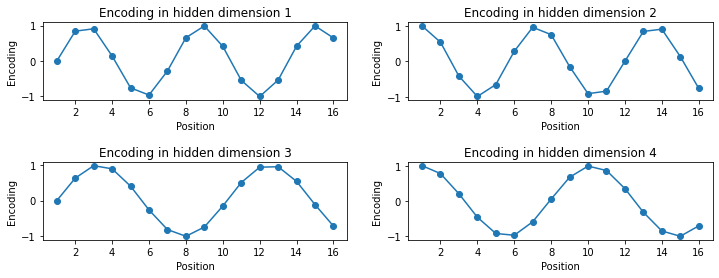

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(12,4))
ax = [a for subplots in ax for a in subplots]
for i in range(len(ax)):
    ax[i].plot(np.arange(1,17), pe[i,:16], marker="o", markersize=6)
    ax[i].set_title(f"Encoding in hidden dimension {i+1}")
    ax[i].set_xlabel("Position")
    ax[i].set_ylabel("Encoding")
fig.subplots_adjust(hspace=0.8)
plt.show()